In [2]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## COMORBIDITIES DATA

In [3]:
com24 = pd.read_csv('./com24.csv')

#EXTRACT FEATURES AND LABELS
Y24 = com24['aki_flag'] 
X24 = com24.iloc[:,2:] 

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train24, X_test24, y_train24, y_test24 = tts(X24, Y24, test_size=0.3, random_state=42)

In [4]:
com48 = pd.read_csv('./com48.csv')

Y48 = com48['aki_flag'] #all rows of 'aki_flag' as LABELS
X48 = com48.iloc[:,2:]  #features

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train48, X_test48, y_train48, y_test48 = tts(X48, Y48, test_size=0.3, random_state=42)

In [5]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'learning_rate':[0.1,0.05,0.01,1,0.5,0.25, 0.75], 'max_depth' :[1,2,3,4,5], 'n_estimators':[100,250,500]}
] 

In [6]:
gs24 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p24 = Pipeline(steps=[('r', resample), ('gs', gs24)])

gs48 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p48 = Pipeline(steps=[('r', resample), ('gs', gs48)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [7]:
gs24.fit(X_train24, y_train24)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.709 total time=   2.9s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.706 total time=   2.7s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.709 total time=   3.3s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.704 total time=   4.6s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.706 total time=   4.7s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.708 total time=   9.3s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.706 total time=   7.5s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.710 total time=   8.8s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.706 total time=   8.3s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.706 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.706 total time=  21.4s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.710 total time=  20.3s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.706 total time=  19.9s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.706 total time=  19.8s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.706 total time=   5.0s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.706 total time=   5.1s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.709 total time=   5.2s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   5.1s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.706 total time=   5.4s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.704 total time=  13.0s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.707 total time=  12.2s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.704 total time=  12.7s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.706 total time=  12.2s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.706 total time=  24.4s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.706 total time=  24.3s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.709 total time=  24.5s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  24.1s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.706 total time=  24.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.707 total time=   6.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.707 total time=   6.3s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.705 total time=   4.1s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.701 total time=  11.9s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.706 total time=  13.6s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.707 total time=  13.2s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.700 total time=  13.9s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.705 total time=  13.8s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.701 total time=  26.6s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.706 total time=  41.3s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.706 total time=  26.6s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.700 total time=  35.6s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.712 total time= 9.0min
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.700 total time=   5.7s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.704 total time=   5.9s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.702 total time=  15.0s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.703 total time=  14.2s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.712 total time=  14.3s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.700 total time=  24.3s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.702 total time=  12.8s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.702 total time=  23.3s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.703 total time=  27.3s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.700 total time=  26.8s
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.702 total time=  28.1s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.700 total time=   7.4s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.703 total time=   6.9s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.709 total time=   7.2s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.698 total time=   7.2s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.706 total time=   7.7s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.700 total time=  18.2s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.703 total time=  18.0s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.711 total time=  18.1s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.706 total time=  19.3s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.701 total time=  42.1s
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.703 total time=  37.2s
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.711 total time=  38.9s
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.698 total time=  35.5s
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.705 total time=  38.0s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [8]:
print("The best parameters found for the 24h DCW:")
print(gs24.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs24.best_estimator_)

The best parameters found for the 24h DCW:
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
The best estimator found for the 24h DCW:
GradientBoostingClassifier(max_depth=1, n_estimators=250)


In [9]:
gs48.fit(X_train48, y_train48)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   2.4s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.7s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.763 total time=   2.1s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.7s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   2.3s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   5.6s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   5.6s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.763 total time=   4.3s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   5.1s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=  10.2s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.763 total time=   9.8s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=  10.4s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=  11.2s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.763 total time=   2.8s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   2.1s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.763 total time=   1.8s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.763 total time=   1.9s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.763 total time=   2.1s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.762 total time=   4.6s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.763 total time=   4.2s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.764 total time=   4.3s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.763 total time=   4.4s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.763 total time=   8.5s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=   8.5s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.763 total time=   8.6s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=   8.4s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.763 total time=   8.9s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   2.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   2.3s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.760 total time=   2.1s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.759 total time=   5.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.758 total time=   5.1s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.764 total time=   5.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.762 total time=   5.2s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.760 total time=   5.2s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.761 total time=  10.1s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.758 total time=  10.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.764 total time=  10.6s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.762 total time=   9.6s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.765 total time=   2.4s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.760 total time=   2.5s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.758 total time=   2.5s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.762 total time=   6.4s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.760 total time=   6.2s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.765 total time=   6.5s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.760 total time=   6.7s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.758 total time=   6.7s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.762 total time=  13.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.760 total time=  12.1s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.760 total time=  12.4s
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.758 total time=  12.9s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.761 total time=   3.3s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.759 total time=   3.3s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.763 total time=   3.3s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.760 total time=   3.2s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.759 total time=   3.1s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.763 total time=   8.0s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.760 total time=   8.0s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.763 total time=   7.8s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.760 total time=   6.5s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.764 total time=  13.0s
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.761 total time=  12.8s
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.765 total time=  12.8s
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.763 total time=  12.7s
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.760 total time=  12.7s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [10]:
print("The best parameters found for the 48h DCW:")
print(gs48.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 48h DCW:")
print(gs48.best_estimator_)

The best parameters found for the 48h DCW:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
The best estimator found for the 48h DCW:
GradientBoostingClassifier(learning_rate=0.01, max_depth=4)


In [11]:
best24 = GradientBoostingClassifier(max_depth=1, n_estimators=250)
best48 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4)

In [12]:
y_pred24 = cross_val_predict(best24, X24, Y24, cv = 5)

In [13]:
y_pred48 = cross_val_predict(best48, X48, Y48, cv = 5)

In [14]:
#CLASSIFICATION REPORT 24H
print(classification_report(Y24, y_pred24))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10761
           1       0.56      0.01      0.03      4521

    accuracy                           0.71     15282
   macro avg       0.63      0.50      0.43     15282
weighted avg       0.66      0.71      0.59     15282



In [15]:
print(accuracy_score(Y24, y_pred24))

0.7050124329276273


In [16]:
print(precision_score(Y24, y_pred24))

0.5607476635514018


In [17]:
print(recall_score(Y24, y_pred24))

0.013271400132714002


In [18]:
print(f1_score(Y24, y_pred24))

0.02592912705272256


In [19]:
print(roc_auc_score(Y24, y_pred24))

0.5044518881529662


In [20]:
#CLASSIFICATION REPORT 48H
print(classification_report(Y48, y_pred48))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6021
           1       0.27      0.00      0.00      1841

    accuracy                           0.77      7862
   macro avg       0.52      0.50      0.44      7862
weighted avg       0.65      0.77      0.66      7862



In [21]:
print(accuracy_score(Y48, y_pred48))

0.7651996947341644


In [22]:
print(precision_score(Y48, y_pred48))

0.2727272727272727


In [23]:
print(recall_score(Y48, y_pred48))

0.0016295491580662683


In [24]:
print(f1_score(Y48, y_pred48))

0.0032397408207343412


In [25]:
print(roc_auc_score(Y48, y_pred48))

0.5001504331075167


Elapsed time to compute the importances: 0.069 seconds


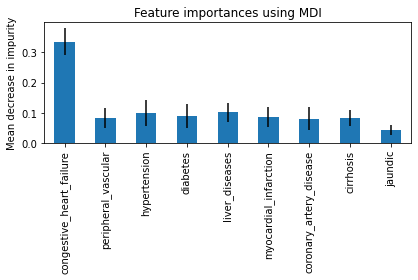

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#FEATURES SELECTION BASED ON THEIR IMPORTANCE WITH A RANDOM FOREST CLASSIFIER 
feature_names24 = [f'feature {i}' for i in range(X24.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train24, y_train24)

import time

start_time24 = time.time()
importances24 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time24 = time.time() - start_time24

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time24:.3f} seconds")

forest_importances24 = pd.Series(importances24, index=com24.columns[2:])

fig, ax = plt.subplots()
forest_importances24.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [27]:
for i,v in enumerate(importances24):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.33577
Feature: 1, Score: 0.08262
Feature: 2, Score: 0.09875
Feature: 3, Score: 0.08889
Feature: 4, Score: 0.10162
Feature: 5, Score: 0.08585
Feature: 6, Score: 0.08085
Feature: 7, Score: 0.08239
Feature: 8, Score: 0.04326


Elapsed time to compute the importances: 0.073 seconds


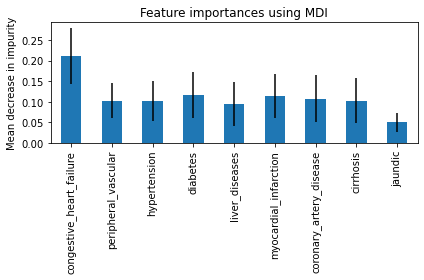

In [28]:
#DO IT FOR THE 48H DCW NOW
feature_names48 = [f'feature {i}' for i in range(X48.shape[1])]
#forest = RandomForestClassifier(random_state=0)
forest.fit(X_train48, y_train48)

start_time48 = time.time()
importances48 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time48 = time.time() - start_time48

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time48:.3f} seconds")

forest_importances48 = pd.Series(importances48, index = com48.columns[2:])

fig, ax = plt.subplots()
forest_importances48.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [29]:
for i,v in enumerate(importances48):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.21066
Feature: 1, Score: 0.10217
Feature: 2, Score: 0.10104
Feature: 3, Score: 0.11662
Feature: 4, Score: 0.09436
Feature: 5, Score: 0.11510
Feature: 6, Score: 0.10721
Feature: 7, Score: 0.10290
Feature: 8, Score: 0.04993


## Try to use the function cross_validate( ) now.

In [30]:
#DEFINE THE METRICS 
scoring=['accuracy','precision','recall', 'roc_auc', 'f1']

In [31]:
p24 = Pipeline(steps=[('r', resample), ('m', best24)])

scores24 = cross_validate(p24, X24, Y24, scoring = scoring, cv = 5)

In [33]:
scores24['test_accuracy'].mean()

0.6272090104763421

In [34]:
scores24['test_precision'].mean()

0.37764736612310323

In [35]:
scores24['test_recall'].mean()

0.4018977656089572

In [36]:
scores24['test_f1'].mean()

0.38876017544290603

In [37]:
scores24['test_roc_auc'].mean()

0.5754074431954084

In [32]:
p48 = Pipeline(steps=[('r', resample), ('m', best48)])

scores48 = cross_validate(p48, X48, Y48, scoring = scoring, cv = 5)

In [38]:
scores48['test_accuracy'].mean()

0.6344522468047797

In [39]:
scores48['test_precision'].mean()

0.2733331280627304

In [40]:
scores48['test_recall'].mean()

0.3378004595263344

In [41]:
scores48['test_f1'].mean()

0.29913334035724615

In [42]:
scores48['test_roc_auc'].mean()

0.5352911864898213